# Project: Investigate a Dataset (IMDb movies)

## Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### questions  to be answered at the end of the project
    1- does higher budget means more success (popularity & revenue & vote_average)
    2- what genres are most common?
    3- can the direactor make the movie more sccessful?
    4- what are the most sccessful movies ever? what might lead to this success?
    5- is there a correlation between year of release & revenue?
    6- is there a correlation between year of release & number of movies released?
    7- what is the ideal runtime for a movie?

In [612]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [613]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('imdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


    - in 'cast' column there are many values seperated by '|' 
    - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,
    accounting for inflation over time

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### after investigating the types of the dataset, the following steps need to be done in cleaning phase

    change id to object
    remove tt from beginging of imdb_id
    round popularity to 2 numbers
    change release_date type to date

In [615]:
df.describe().apply(lambda s:s.apply('{0:.5f}'.format))

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000
mean,66064.17743,0.64644,14625701.09415,39823319.79339,102.07086,217.38975,5.97492,2001.32266,17551039.82289,51364363.25325
std,92130.13656,1.00018,30913213.83144,117003486.58209,31.38141,575.61906,0.93514,12.81294,34306155.72284,144632485.03997
min,5.00000,0.00006,0.00000,0.00000,0.00000,10.00000,1.50000,1960.00000,0.00000,0.00000
25%,10596.25000,0.20758,0.00000,0.00000,90.00000,17.00000,5.40000,1995.00000,0.00000,0.00000
50%,20669.00000,0.38386,0.00000,0.00000,99.00000,38.00000,6.00000,2006.00000,0.00000,0.00000
75%,75610.00000,0.71382,15000000.00000,24000000.00000,111.00000,145.75000,6.60000,2011.00000,20853251.08440,33697095.71731
max,417859.00000,32.98576,425000000.00000,2781505847.00000,900.00000,9767.00000,9.20000,2015.00000,425000000.00000,2827123750.41189


    - from the previous step we can get a good grasp of the overall statistics of the dataset..
    this will help in the analysis and visualization phase
#### after investigating the statictics of the dataset, the following steps need more invistigating

    many budgets have values of 0
    many revenues have values of 0
    runtime has minimun value of 0

### more invistigations

#### check for nans in columns

In [616]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

    drow all rows with no [imdb_id - cast - genres]

#### check for duplicates

In [617]:
df.id.value_counts()
## id =42194 is present twice

42194     2
16384     1
745       1
17037     1
72334     1
         ..
11615     1
251232    1
112205    1
101731    1
9600      1
Name: id, Length: 10865, dtype: int64

In [618]:
df[df['id']==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


    line with id= 42194 is a duplicate.. drop one of them

In [619]:
df.budget.value_counts()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
1645000        1
34200000       1
82500000       1
4250000        1
4653000        1
Name: budget, Length: 557, dtype: int64

In [620]:
df.revenue.value_counts()

0            6016
12000000       10
10000000        8
11000000        7
5000000         6
             ... 
29300000        1
32189727        1
46546197        1
106269971       1
16017403        1
Name: revenue, Length: 4702, dtype: int64

In [621]:
df[(df['budget']==0) & (df['revenue']==0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.0


    many movies has no budget nor revenue values.. these will be dropped to make clean dataset

## Data Cleaning (solve the quality and tidiness issues)

In [622]:
''' first thing we make a copy before we make any changes
then comment it to prevent the clean copy from changing if I rerun the cell'''

df_clean= df

"' first thing we make a copy before we make any changes\nthen comment it to prevent the clean copy from changing if I rerun the cell"

### 1) fix the wrong data types
    change id to object
    change release_date type to date

In [623]:
df.id= df.id.astype('object')

In [624]:
df.release_date= pd.to_datetime(df.release_date)

#### test

In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  object        
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

### 2) remove tt from beginging of imdb_id

In [626]:
df.imdb_id= df.imdb_id.str.replace('tt','')

#### test

In [627]:
df.imdb_id

0        0369610
1        1392190
2        2908446
3        2488496
4        2820852
          ...   
10861    0060371
10862    0060472
10863    0060161
10864    0061177
10865    0060666
Name: imdb_id, Length: 10866, dtype: object

### 3) drop rows with NaNs in [imdb_id - cast - genres]

In [628]:
df = df[df['imdb_id'].notna()]
df = df[df['cast'].notna()]
df = df[df['genres'].notna()]

#### test

In [629]:
df.imdb_id.isna().sum()
df.cast.isna().sum()
df.genres.isna().sum()

0

### 4) drop duplicate rows

In [630]:
df.drop_duplicates(inplace= True)

#### test

In [631]:
df[df['id']==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


### 5) drop rows with no (budget & revenue)

In [632]:
df= df[(df['budget']!=0) & (df['revenue']!=0)]

#### test

In [633]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,An American scientist publicly defects to East...,128,Mystery|Thriller,Universal Pictures,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,"Cole Thornton, a gunfighter for hire, joins fo...",120,Action|Western,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,Engineer Jake Holman arrives aboard the gunboa...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08


### reset indexes

In [634]:
df= df.reset_index(drop= True)

#### test

In [635]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,396,0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
3846,5780,0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,An American scientist publicly defects to East...,128,Mystery|Thriller,Universal Pictures,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
3847,6644,0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,"Cole Thornton, a gunfighter for hire, joins fo...",120,Action|Western,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
3848,5923,0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,Engineer Jake Holman arrives aboard the gunboa...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08


<a id='eda'></a>
## Exploratory Data Analysis

###### these are the quetions I am going to explore in the following steps
    1- does higher budget means more success (popularity & revenue & vote_average)
    2- what genres are most common?
    3- can the direactor make the movie more sccessful?
    4- what are the most sccessful movies ever? what might lead to this success?
    5- is there a correlation between year of release & revenue?
    6- is there a correlation between year of release & number of movies released?
    7- what is the ideal runtime for a movie?

In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3850 non-null   object        
 1   imdb_id               3850 non-null   object        
 2   popularity            3850 non-null   float64       
 3   budget                3850 non-null   int64         
 4   revenue               3850 non-null   int64         
 5   original_title        3850 non-null   object        
 6   cast                  3850 non-null   object        
 7   homepage              1425 non-null   object        
 8   director              3849 non-null   object        
 9   tagline               3572 non-null   object        
 10  keywords              3713 non-null   object        
 11  overview              3850 non-null   object        
 12  runtime               3850 non-null   int64         
 13  genres            

In [637]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


### Research Question 1 (does higher budget means more success? and what budged is ideal?)

##### - relation between budget & popularity

In [638]:
'''statistics of the all movies'''
df.popularity.describe()

count    3850.000000
mean        1.192661
std         1.475527
min         0.001117
25%         0.463201
50%         0.798343
75%         1.372826
max        32.985763
Name: popularity, dtype: float64

In [639]:
'''statistics of the movies with highest budget'''
df1= df.sort_values('budget', ascending= False)
df1.head(1000).popularity.describe()

count    1000.000000
mean        1.989529
std         2.284228
min         0.040858
25%         0.877057
50%         1.366627
75%         2.316738
max        32.985763
Name: popularity, dtype: float64

    from previous statistics we conclude that movies with higest budget have much higher popularity rates

##### - relation between budget & revenue

In [640]:
'''statistics of the all movies'''
df.revenue.describe()

count    3.850000e+03
mean     1.077897e+08
std      1.766015e+08
min      2.000000e+00
25%      1.363273e+07
50%      4.488472e+07
75%      1.242969e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [641]:
'''statistics of the movies with highest budget'''
df1= df.sort_values('budget', ascending= False)
df1.head(1000).revenue.describe()

count    1.000000e+03
mean     2.556869e+08
std      2.682828e+08
min      1.440000e+02
25%      8.504535e+07
50%      1.709991e+08
75%      3.304780e+08
max      2.781506e+09
Name: revenue, dtype: float64

    from previous statistics we conclude that movies with higest budget have higher revenue rates

##### - relation between budget & vote_average

In [642]:
'''statistics of the all movies'''
df.vote_average.describe()

count    3850.000000
mean        6.168597
std         0.794616
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [643]:
'''statistics of the movies with highest budget'''
df1= df.sort_values('budget', ascending= False)
df1.head(1000).vote_average.describe()

count    1000.00000
mean        6.15620
std         0.76259
min         2.20000
25%         5.60000
50%         6.10000
75%         6.60000
max         8.10000
Name: vote_average, dtype: float64

    from previous statistics we conclude that movies with higest budget have higher vote_average rates (but the highest movies in vote_average are not in the list of the higest budget movies)

##### - statistics about budget that results to highest revenue

In [644]:
df1= df.sort_values('revenue', ascending= False)
df1.head(1000).budget.describe()

count    1.000000e+03
mean     7.768619e+07
std      5.543574e+07
min      1.500000e+04
25%      3.500000e+07
50%      6.500000e+07
75%      1.050000e+08
max      3.800000e+08
Name: budget, dtype: float64

In [645]:
df1= df.sort_values('vote_average', ascending= False)
df1.head(1000).budget.describe()

count    1.000000e+03
mean     3.610323e+07
std      4.739577e+07
min      3.000000e+00
25%      6.500000e+06
50%      1.800000e+07
75%      4.400000e+07
max      3.000000e+08
Name: budget, dtype: float64

    to make a movie with high revenue and high vote average.. it should have a budget between 3.5*10^7 & 4.4*10^8

##### conclusion: to make a better movie it's recommended to increase the budget ,, but beware that increasing the budget won't necessarily make the movie get the highest vote average possible

### Research Question 2  (what genres are most common?)

In [646]:
df1= df.genres.str.split('|', expand= True).rename(columns=lambda x: f"genre_{x+1}")
df1

,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
3845,Drama,None,None,None,None
3846,Mystery,Thriller,None,None,None
3847,Action,Western,None,None,None
3848,Action,Adventure,Drama,War,Romance


In [647]:
'''add the counts of each genre from [genre_1 - genre_2 -....] to one list containg all counts for all genres'''
genre_counts= df1.genre_1.value_counts() + df1.genre_2.value_counts() + df1.genre_3.value_counts() + df1.genre_4.value_counts() + df1.genre_5.value_counts()
# we add some values manually to avoid error (as some columns has no values for some rows)
genre_counts['Documentary']=477
genre_counts['TV Movie']= 1 
genre_counts['Foreign']= 6 + 3 + 4
genre_counts

Action             1085.0
Adventure           749.0
Animation           201.0
Comedy             1358.0
Crime               651.0
Documentary         477.0
Drama              1754.0
Family              425.0
Fantasy             396.0
Foreign              13.0
History             129.0
Horror              463.0
Music               134.0
Mystery             344.0
Romance             667.0
Science Fiction     519.0
TV Movie              1.0
Thriller           1203.0
War                 119.0
Western              52.0
dtype: float64

In [648]:
df1.genre_5.value_counts()

Thriller           54
Science Fiction    40
Romance            25
Family             23
Mystery            18
Fantasy            18
War                12
Crime              11
Drama              11
Music              10
Comedy              9
Adventure           8
Action              6
Horror              6
Western             4
History             2
Animation           2
Name: genre_5, dtype: int64

<AxesSubplot:>

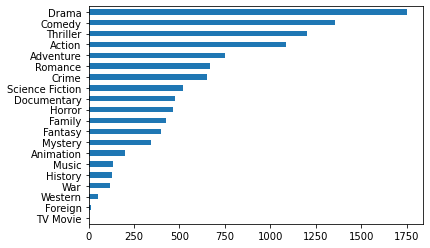

In [649]:
genre_counts.sort_values().plot(kind='barh')

##### conclusion: the most common genres among movies are as shown in the figure above 

### Research Question 3  (can the direactor make the movie more sccessful?)


In [650]:
df.popularity.describe()

count    3850.000000
mean        1.192661
std         1.475527
min         0.001117
25%         0.463201
50%         0.798343
75%         1.372826
max        32.985763
Name: popularity, dtype: float64

<AxesSubplot:ylabel='director'>

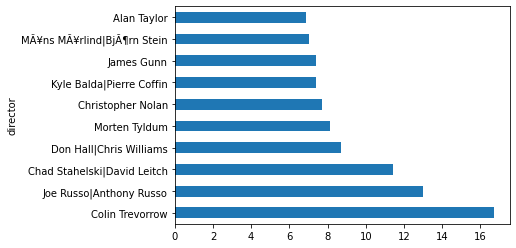

In [651]:
df1= df.groupby('director')['popularity'].mean().sort_values(ascending= False).head(10)
df1.plot(kind='barh')

    these are the highest directors in popularity mean for all of

<AxesSubplot:ylabel='director'>

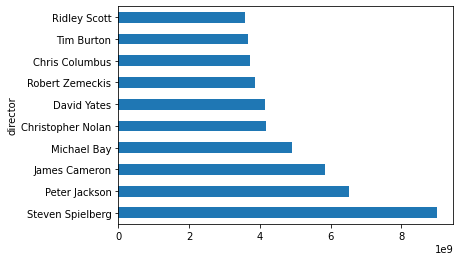

In [652]:
df2= df.groupby('director')['revenue'].sum().sort_values(ascending= False).head(10)
df2.plot(kind='barh')

    these are the highest directors in total revenue for all of
    their movies

<AxesSubplot:ylabel='director'>

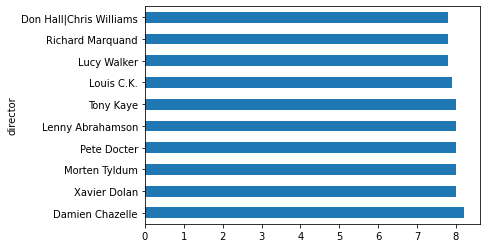

In [653]:
df3= df.groupby('director')['vote_average'].mean().sort_values(ascending= False).head(10)
df3.plot(kind='barh')

    these are the highest directors in vote average mean for all of their movies

#### Conclusion: I found no common director in the 3 figures above.. which might mean that there is no best director in all aspects

### Research Question 4 (what are the most sccessful movies ever? what might lead to this success?)

0      Action|Adventure|Science Fiction|Thriller
1      Action|Adventure|Science Fiction|Thriller
160              Adventure|Drama|Science Fiction
161             Action|Science Fiction|Adventure
2             Adventure|Science Fiction|Thriller
162             Action|Adventure|Science Fiction
325             Adventure|Action|Science Fiction
163                              Action|Thriller
3       Action|Adventure|Science Fiction|Fantasy
164           Science Fiction|Adventure|Thriller
Name: genres, dtype: object

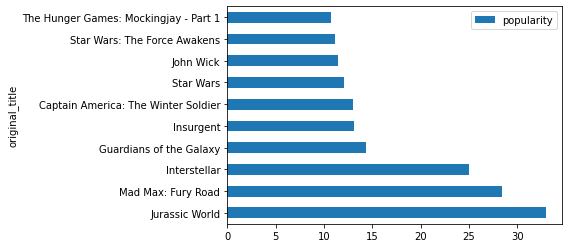

In [654]:
df1= df.sort_values('popularity', ascending= False).head(10)
df2= df1.loc[:, ['original_title', 'popularity']].plot(kind='barh', x='original_title')
df3= df1.genres
df3

    - these are the higest movies in terms of popularity
    - most common genres to get high popularity are (Action-Adventure-Science Fiction-Thriller)

344      Action|Adventure|Fantasy|Science Fiction
3        Action|Adventure|Science Fiction|Fantasy
1765                       Drama|Romance|Thriller
1487             Science Fiction|Action|Adventure
0       Action|Adventure|Science Fiction|Thriller
4                           Action|Crime|Thriller
14               Action|Adventure|Science Fiction
1102                     Adventure|Family|Fantasy
1855                   Animation|Adventure|Family
1858             Action|Adventure|Science Fiction
Name: genres, dtype: object

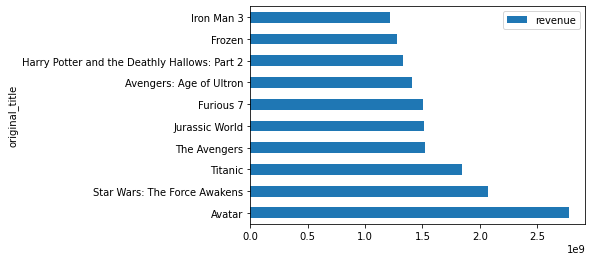

In [655]:
df1= df.sort_values('revenue', ascending= False).head(10)
df2= df1.loc[:, ['original_title', 'revenue']].plot(kind='barh', x='original_title')
df3= df1.genres
df3

    - these are the higest movies in terms of revenue
    - most common genres to get high revenue are (Action-Adventure-Science Fiction-Thriller)

2802              Documentary|Music
1426                    Drama|Crime
2555                    Drama|Crime
181                     Drama|Music
3525                    Drama|Crime
696                           Drama
3659              Drama|History|War
933     Drama|Action|Crime|Thriller
1425                 Thriller|Crime
1427           Comedy|Drama|Romance
Name: genres, dtype: object

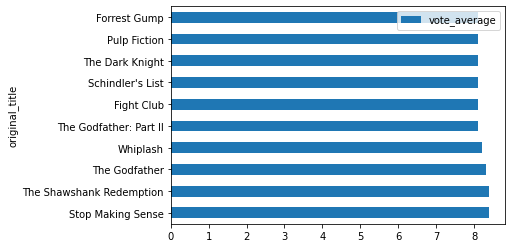

In [656]:
df1= df.sort_values('vote_average', ascending= False).head(10)
df2= df1.loc[:, ['original_title', 'vote_average']].plot(kind='barh', x='original_title')
df3= df1.genres
df3

    - these are the higest movies in terms of vote average
    - most common genres to get high vote average are (Crime-Drama-Music)

#### Conclusion: best movies in terms of (popularity & revenue) have a genres of [Action-Adventure-Science Fiction-Thriller], and in terms of (vote average) have genres of [Crime-Drama-Music]

### Research Question 5 (is there a correlation between year of release & revenue?)

In [657]:
# make a copy of the data.. then make a new column with the year only
df1= df
df1['release_year']= df1['release_date'].dt.year

In [658]:
''' I have found that movies released before 1971 have wrong date 
for example (movie release at 1970 has release date of 2070) '''
'''so I will fix this first using the new column of release_year'''
# drop the rows with wrong dates (they are few, so it's okey to drop them)
df1= df1[df1['release_year'] < 2016 ]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3768 entries, 0 to 3844
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3768 non-null   object        
 1   imdb_id               3768 non-null   object        
 2   popularity            3768 non-null   float64       
 3   budget                3768 non-null   int64         
 4   revenue               3768 non-null   int64         
 5   original_title        3768 non-null   object        
 6   cast                  3768 non-null   object        
 7   homepage              1417 non-null   object        
 8   director              3767 non-null   object        
 9   tagline               3497 non-null   object        
 10  keywords              3632 non-null   object        
 11  overview              3768 non-null   object        
 12  runtime               3768 non-null   int64         
 13  genres            

<AxesSubplot:xlabel='release_year'>

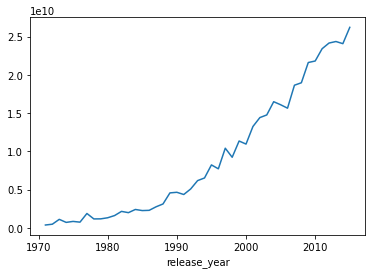

In [659]:
df2= df1.groupby('release_year')['revenue'].sum()
df2.plot()

#### Conclusion: total revenue per year is in a positive correlation with the time

### Research Question 6 (is there a correlation between year of release & number of movies released?)

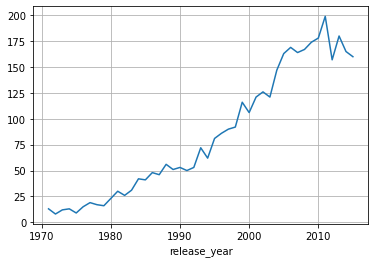

In [660]:
# use df1 (containg column with a release_year)
df2= df1.groupby('release_year')['original_title'].count()
df2.plot(kind= 'line')
plt.grid()

#### Conclusion: number of movies released per year is in a positive correlation with the time (but for the last 4 years [2012-2013-2014-2015] the number decreased)

### Research Question 7 (what is the ideal runtime for a movie?)

<AxesSubplot:xlabel='runtime'>

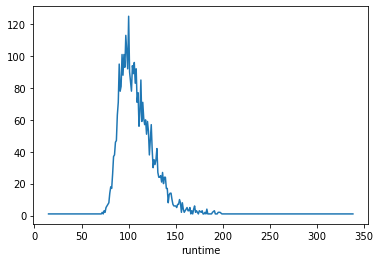

In [661]:
# make a series of runtimes with their counts
df1= df.groupby('runtime')['id'].count()
df1.plot()

    most movies has a runtime of 80- 140 minutes long

<AxesSubplot:xlabel='runtime'>

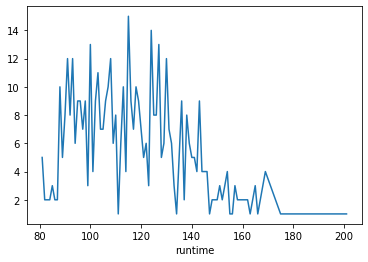

In [662]:
"""let's compare this with the runtime of the highest 500 movies in revenue"""

df1= df.sort_values('revenue', ascending= False).head(500).groupby('runtime')['id'].count()
df1.plot()

#### Conclusion: successful movies (as well as most movies) has a runtime of 80- 140 minutes long

## Conclusions

    in this project I have explained in analysis and visualizations how to identify a successful movie, and showed many successful movies on all of the success criteria, in addition to exploring many other aspects of the dataset.

    I have answered these questions using analysis and visualizations methods

>1- does higher budget means more success (popularity & revenue & vote_average)

Conclusion: to make a better movie it's recommended to increase the budget, but beware that increasing the budget won't necessarily make the movie get the highest vote average possible
    
>2- what genres are most common?

Conclusion: the most common genres among movies are [Drama- Comedy- Thriller- Action] and the rest are shown in the figure 

>3- can the director make the movie more successful?

Conclusion: I found no common director in the top directors in the 3 categories of success [revenue- popularity- vote average].. which might mean that there is no best director in all aspects.
    *To know the top directors in each category see the figure in Research Question 3

>4- what are the most successful movies ever? what might lead to this success?

Conclusion: best movies in terms of (popularity & revenue) have a genre of [Action-Adventure-Science Fiction-Thriller], and in terms of (vote average) have genres of [Crime-Drama-Music]

>5- is there a correlation between year of release & revenue?

Conclusion: total revenue per year is in a positive correlation with the time

>6- is there a correlation between year of release & number of movies released?

Conclusion: number of movies released per year is in a positive correlation with the time (but for the last 4 years [2012-2013-2014-2015] the number decreased)

>7- what is the ideal runtime for a movie?

Conclusion: successful movies (as well as most movies) have a runtime of 80- 140 minutes long

# ــــــــــــــــــــــــــ

## Limitations
the dataset was fine and not very hard to clean. but some of the obvious limitations was that it only contained data of movies until the end of 2015. that resulted to some inaccurate calculations (compared to the reality) because in the last years the market of making the movies has changed rapidly and a huge number of movies including some of the biggest movies in the history of making the movies.
 
